In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
# the data, split between train and test sets
from keras.utils import np_utils
from sklearn.model_selection import KFold
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import SGD
# the MNIST data is split between train and test sets
from sklearn.neural_network import MLPClassifier
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [49]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
    

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
    
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
    


In [33]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [50]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('mnist_keras_cnn_model.h5')

Epoch 1/10
469/469 - 42s - loss: 0.3113 - accuracy: 0.9456 - val_loss: 0.0494 - val_accuracy: 0.9852
Epoch 2/10
469/469 - 46s - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 3/10
469/469 - 50s - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0280 - val_accuracy: 0.9915
Epoch 4/10
469/469 - 51s - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0332 - val_accuracy: 0.9896
Epoch 5/10
469/469 - 53s - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 6/10
469/469 - 53s - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0321 - val_accuracy: 0.9904
Epoch 7/10
469/469 - 53s - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0422 - val_accuracy: 0.9876
Epoch 8/10
469/469 - 53s - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0378 - val_accuracy: 0.9884
Epoch 9/10
469/469 - 54s - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0457 - val_accuracy: 0.9861
Epoch 10/10
469/469 - 54s - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0392 - val_accura

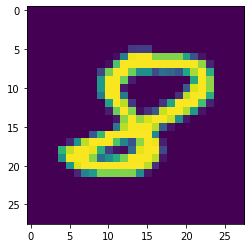

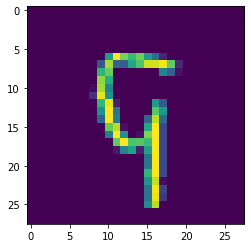

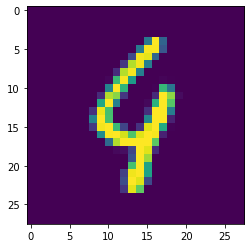

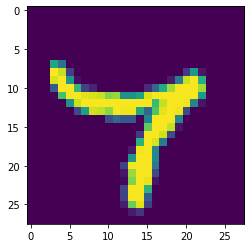

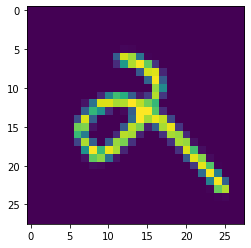

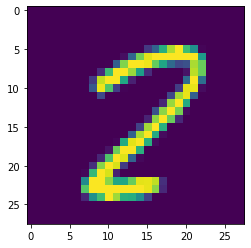

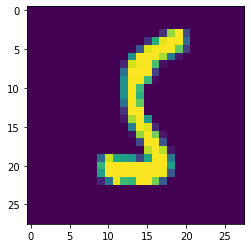

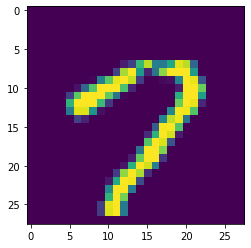

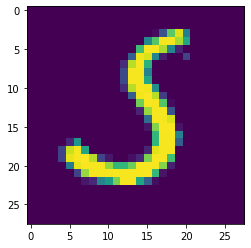

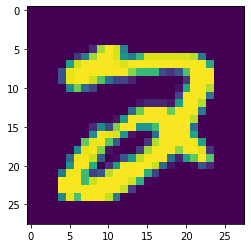

In [62]:
# samples to test
test_samples = [61, 62, 115,124, 149, 9867, 9883, 9916, 9970, 9980]

# Generate plots for samples
for sample in test_samples:
    
  reshaped_image = X_test[sample].reshape((img_cols, img_rows))
  plt.imshow(reshaped_image)
  plt.show()

In [63]:
#predictions for the samples displayed before
np.argmax(model.predict(X_test[[test_samples]]), axis = 1)

<ipython-input-63-746564026fe3>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.argmax(model.predict(X_test[[use_samples]]), axis = 1)


array([8, 9, 4, 7, 2, 2, 5, 7, 5, 2], dtype=int64)

In [69]:
df=pd.DataFrame({"Value":np.argmax(y_test,axis=1),"Prediction":np.argmax(model.predict(X_test), axis = 1)})
df["Correct"]=df["Value"]==df["Prediction"]

In [71]:
df[df["Correct"]==False]

,Value,Prediction,Correct
184,8,3,False
320,9,8,False
321,2,7,False
340,5,3,False
445,6,0,False
...,...,...,...
9692,9,4,False
9729,5,6,False
9770,5,0,False
9811,2,7,False


In [66]:
np.argmax(y_test,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [ ]:
df